In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from insightface.app import FaceAnalysis

In [2]:
import re

In [3]:
faceapp= FaceAnalysis(name='buffalo_sc',root='insightface_model',providers=['CPUExecutionProvider'])
faceapp.prepare(ctx_id=0,det_size=(640,640),det_thresh=0.5)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [4]:
def clean_name(string):
    string=re.sub(r'[^A-Za-z]',' ',string)
    return string

In [5]:
person_info=[]
listdir=os.listdir(path='images')
for folder_name in listdir:
    role,name=folder_name.split('-')
    name=clean_name(name)
    role=clean_name(role)
    #print('Role=',role,end='\t')
    #print('name=',name)
    
    img_files=os.listdir(path=f'images/{folder_name}')
    for file in img_files:
        path=f'images/{folder_name}/{file}'
        #print(path)
        img_arr=cv2.imread(path)
        result=faceapp.get(img_arr,max_num=1)
        if len(result)>0:
            res=result[0]
            embedding=res['embedding']
            person_info.append([name,role,embedding])

In [6]:
dataframe=pd.DataFrame(person_info,columns=['Name','Role','Faciafeatures'])
dataframe

,Name,Role,Faciafeatures
0,Angelina Jolie,student,"[-0.8409761, 1.6623005, -0.7457807, -2.1380825..."
1,Angelina Jolie,student,"[0.09012362, -0.41691065, -0.3765071, 0.424012..."
2,Angelina Jolie,student,"[0.8638971, 0.32952023, 0.05781907, -1.4538239..."
3,Angelina Jolie,student,"[1.6611186, 1.1610861, -0.4107926, -2.6411536,..."
4,Angelina Jolie,student,"[0.86431247, 0.94376194, 0.42651647, -1.183689..."
5,Angelina Jolie,student,"[0.4107246, 1.1821758, -0.99553794, -1.4014192..."
6,Angelina Jolie,student,"[0.42289665, 2.0846782, 1.0648305, -2.2739336,..."
7,Angelina Jolie,student,"[0.3944187, 0.8441229, -0.6154817, -2.1047823,..."
8,Angelina Jolie,student,"[1.0931162, 1.1680486, -0.28963193, -2.0099525..."
9,Angelina Jolie,student,"[-0.6354259, 1.7897136, 0.59832555, -3.5500882..."


In [7]:
img_test=cv2.imread('test_images/test_2.jpg')
cv2.imshow('test images',img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
res_test=faceapp.get(img_test,max_num=0)
for i,rt in enumerate(res_test):
    print('current loop=',i)
    bbox=rt['bbox'].astype(int)
    score=int(rt['det_score']*100)
    embed_test=rt['embedding']
    

current loop= 0


In [9]:
 len(embed_test)

512

In [10]:
dataframe.head()

,Name,Role,Faciafeatures
0,Angelina Jolie,student,"[-0.8409761, 1.6623005, -0.7457807, -2.1380825..."
1,Angelina Jolie,student,"[0.09012362, -0.41691065, -0.3765071, 0.424012..."
2,Angelina Jolie,student,"[0.8638971, 0.32952023, 0.05781907, -1.4538239..."
3,Angelina Jolie,student,"[1.6611186, 1.1610861, -0.4107926, -2.6411536,..."
4,Angelina Jolie,student,"[0.86431247, 0.94376194, 0.42651647, -1.183689..."


In [11]:
X_list=dataframe['Faciafeatures'].tolist()
X=np.asarray(X_list)

In [12]:
X.shape

(50, 512)

In [13]:
from sklearn.metrics import pairwise

In [14]:
y=embed_test.reshape(1,-1)
equlidean_distances=pairwise.euclidean_distances(X,y)
manhattan_distances=pairwise.manhattan_distances(X,y)
cosine_distances=pairwise.cosine_distances(X,y)

In [15]:
data_search=dataframe.copy()
data_search['equlidean']=equlidean_distances
data_search['manhattan']=manhattan_distances
data_search['cosine']=cosine_distances

In [16]:
data_search

,Name,Role,Faciafeatures,equlidean,manhattan,cosine
0,Angelina Jolie,student,"[-0.8409761, 1.6623005, -0.7457807, -2.1380825...",33.240482,587.153290,1.073150
1,Angelina Jolie,student,"[0.09012362, -0.41691065, -0.3765071, 0.424012...",31.333879,568.543905,0.936306
2,Angelina Jolie,student,"[0.8638971, 0.32952023, 0.05781907, -1.4538239...",32.963993,588.001232,1.004901
3,Angelina Jolie,student,"[1.6611186, 1.1610861, -0.4107926, -2.6411536,...",33.171879,597.137397,0.968360
4,Angelina Jolie,student,"[0.86431247, 0.94376194, 0.42651647, -1.183689...",33.087685,594.655998,1.002288
5,Angelina Jolie,student,"[0.4107246, 1.1821758, -0.99553794, -1.4014192...",32.915031,600.847644,1.022289
6,Angelina Jolie,student,"[0.42289665, 2.0846782, 1.0648305, -2.2739336,...",32.215309,579.038704,1.005193
7,Angelina Jolie,student,"[0.3944187, 0.8441229, -0.6154817, -2.1047823,...",32.009945,580.422967,0.981689
8,Angelina Jolie,student,"[1.0931162, 1.1680486, -0.28963193, -2.0099525...",34.172344,615.053173,1.072707
9,Angelina Jolie,student,"[-0.6354259, 1.7897136, 0.59832555, -3.5500882...",35.435089,629.744062,1.069445


In [17]:
import matplotlib.pyplot as plt

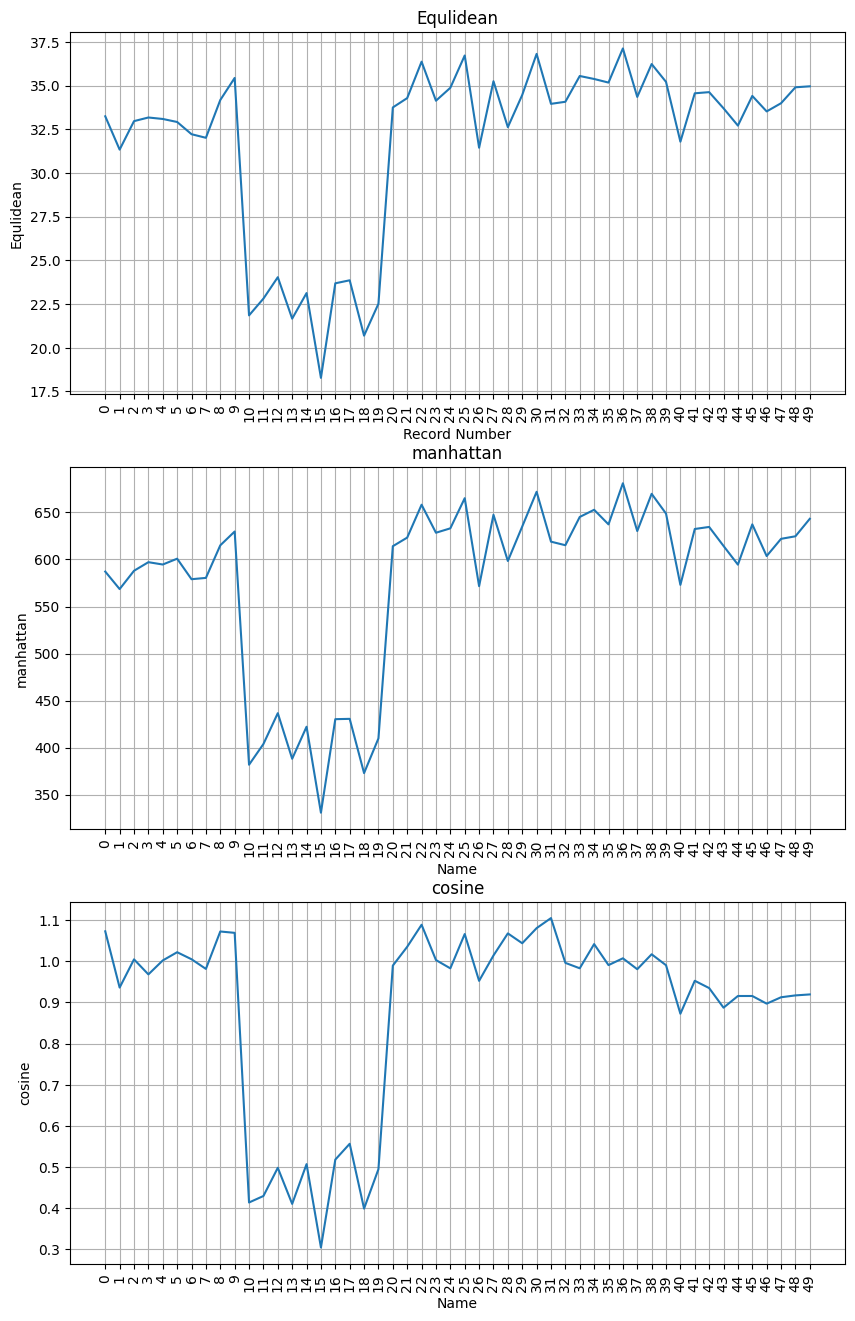

In [18]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean'])
plt.xticks(ticks=list(range(len(data_search['equlidean']))),label=data_search['Name'],rotation=90)
plt.xlabel('Record Number')
plt.ylabel('Equlidean')
plt.title('Equlidean')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'])
plt.xticks(ticks=list(range(len(data_search['equlidean']))),label=data_search['Name'],rotation=90)
plt.xlabel('Name')
plt.ylabel('manhattan')
plt.title('manhattan')
plt.grid()

plt.subplot(3,1,3)
plt.plot(data_search['cosine'])
plt.xticks(ticks=list(range(len(data_search['equlidean']))),label=data_search['Name'],rotation=90)
plt.xlabel('Name')
plt.ylabel('cosine')
plt.title('cosine')
plt.grid()
plt.show()

In [19]:
d_eq_optimal=25

In [20]:
datafilter=data_search.query(f'equlidean<{d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)
if len(datafilter) > 0:
    argmin=datafilter['equlidean'].argmin()
    name,role=datafilter.loc[argmin][['Name','Role']]
else:
    name='Unknown'
    role='Unknown'

In [21]:
print(name,role)

Chris Evans student


In [22]:
d_eq_optimal=450
datafilter=data_search.query(f'manhattan<{d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)
if len(datafilter) > 0:
    argmin=datafilter['manhattan'].argmin()
    name_man,role_man=datafilter.loc[argmin][['Name','Role']]
else:
    name_man='Unknown'
    role_man='Unknown'
    


In [23]:
print(name_man,role_man)

Chris Evans student


In [24]:
argmin

5

In [25]:
datafilter

,Name,Role,Faciafeatures,equlidean,manhattan,cosine
0,Chris Evans,student,"[1.8046335, -2.3015995, -1.5814643, -1.1037467...",21.848963,381.757400,0.413423
1,Chris Evans,student,"[1.7499517, -2.120638, -0.15303394, -0.9053569...",22.807535,403.789990,0.429184
2,Chris Evans,student,"[0.44954205, -1.6314563, -0.9511615, -1.542590...",24.033165,436.587171,0.497805
3,Chris Evans,student,"[0.8585787, -1.1000844, -0.7710805, -1.4918345...",21.661867,388.113587,0.409994
4,Chris Evans,student,"[-1.1621715, -0.68589693, -0.43853593, -2.8765...",23.125246,422.159041,0.506757
5,Chris Evans,student,"[0.35355026, -0.6977061, -0.30065873, -1.91166...",18.273787,330.783694,0.303906
6,Chris Evans,student,"[1.3115604, -2.0907707, -1.0405228, -1.7980803...",23.684464,430.213444,0.517730
7,Chris Evans,student,"[0.9714042, -1.7574675, -1.3090373, -1.0256085...",23.855858,430.545088,0.556251
8,Chris Evans,student,"[0.5908869, -1.415057, -0.6726387, -1.3108956,...",20.689339,372.855217,0.398538
9,Chris Evans,student,"[0.27377778, -0.8834742, -0.56312114, -0.63476...",22.515865,409.769258,0.494515


In [26]:
s_opt=0.5
datafilter=data_search.query(f'cosine>{s_opt}')
datafilter.reset_index(drop=True,inplace=True)
if len(datafilter) > 0:
    argmax=datafilter['manhattan'].argmax()
    name_cos,role_cos=datafilter.loc[argmax][['Name','Role']]
else:
    name_cos='Unknown'
    role_cos='Unknown'

In [27]:
print(name_cos,role_cos)

Barack Obama teacher


In [28]:
#Identify Multiple person in an image 


In [29]:
def ml_search_algorithm(dataframe,feature_column,test_vector,name_role=['Name','Role'],thresh=0.5):
    
    dataframe=dataframe.copy()
    
    X_list=dataframe[feature_column].tolist()
    x=np.asarray(X_list)
    
    similar=pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr=np.array(similar).flatten()
    dataframe['cosine']=similar_arr
    
    data_filter=dataframe.query(f'cosine>={thresh}')
    if len(data_filter)>0:
        data_filter.reset_index(drop=True,inplace=True)
        argmax=data_filter['cosine'].argmax()
        person_name,person_role=data_filter.loc[argmax][name_role]
    else:
        person_name='Unknown'
        person_role='Unknown'
    
    
    return person_name,person_role
    
    
    
    
    
    

In [30]:
test_image=cv2.imread('test_images/test_2.jpg')
cv2.imshow('test image',test_image)
cv2.waitKey()
cv2.destroyAllWindows

<function destroyAllWindows>

In [33]:
results=faceapp.get(test_image)
test_copy=test_image.copy()

for res in results:
    x1,y1,x2,y2=res['bbox'].astype(int)
    embeddings=res['embedding']
    person_name,person_role=ml_search_algorithm(dataframe_compress,'Faciafeatures',test_vector=embeddings,name_role=['Name','Role'],thresh=0.5)
    
    if person_name=='Unknown':
        color=(0,0,255)
    else:
        color=(0,255,0)
    
    
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)
    text_gen=person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_COMPLEX,0.5,color,1)

    

    
cv2.imshow('test_image',test_copy)
cv2.waitKey()
cv2.destroyAllWindows()

In [32]:
dataframe_compress=dataframe.groupby(by=['Name','Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,Name,Role,Faciafeatures
0,Angelina Jolie,student,"[0.43242058, 1.0748497, -0.128624, -1.8332914,..."
1,Barack Obama,teacher,"[0.94858074, -0.5584053, 0.094820514, -1.27965..."
2,Chris Evans,student,"[0.72017145, -1.468415, -0.7781255, -1.4601074..."
3,Morgan Freeman,teacher,"[0.48535085, -0.61925495, -0.4069931, 1.068778..."
4,Scarlett Johansson,student,"[0.19131936, -0.4884374, -1.6902335, 0.4423968..."


In [34]:
xvalues = dataframe_compress.values

In [35]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['Name', 'Role', 'Faciafeatures'], dtype=object)

In [36]:
np.savez('datafrane students teacher.npz', xvalues, col_name)
file_np=np.load('datafrane students teacher.npz',allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [37]:
pd.DataFrame(file_np['arr_0'])

,0,1,2
0,Angelina Jolie,student,"[0.43242058, 1.0748497, -0.128624, -1.8332914,..."
1,Barack Obama,teacher,"[0.94858074, -0.5584053, 0.094820514, -1.27965..."
2,Chris Evans,student,"[0.72017145, -1.468415, -0.7781255, -1.4601074..."
3,Morgan Freeman,teacher,"[0.48535085, -0.61925495, -0.4069931, 1.068778..."
4,Scarlett Johansson,student,"[0.19131936, -0.4884374, -1.6902335, 0.4423968..."
